In [9]:
import numpy as np
import scipy as sc
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

/tmp/ipykernel_11706/4264265003.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, sc.stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf, m=5',
/tmp/ipykernel_11706/4264265003.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, sc.stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf, m=5',


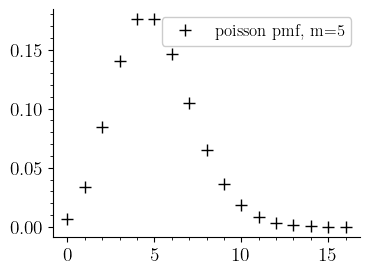

In [10]:
# Scipy Poisson distribution test
mu = 5
x = np.arange(sc.stats.poisson.ppf(0.00001,mu), sc.stats.poisson.ppf(0.99999,mu))
plt.plot(x, sc.stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf, m=5',
         marker='+', c='black')
plt.legend()


In [11]:
lowmean = np.loadtxt('../data/stat_lowmean3ms.TKA')
lowmean

array([ 0., 12.,  5., ...,  0.,  2.,  0.])

In [12]:
m = np.mean(lowmean)
print(f"Mean of the low mean distribution measure set: {m}")

Mean of the low mean distribution measure set: 2.27001953125


<BarContainer object of 11 artists>

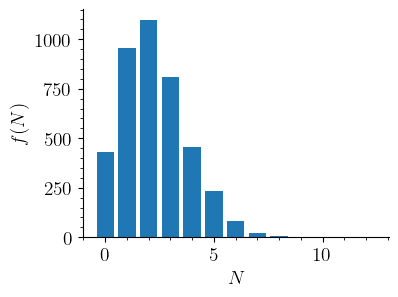

In [13]:
N, frequencies = np.unique_counts(lowmean)
# plt.scatter(N, frequencies)
plt.xlabel("$N$")
plt.ylabel("$f(N)$")
plt.bar(N, frequencies)
# plt.hist(lowmean, bins=range(len(values)+2), align='mid')

À NOTER QUE LA FONCTION CHISQUARE DE SCIPY FAIT TOUT ÇA EN UNE LIGNE MAIS BREF JE VEUX APPRENDRE

In [14]:
np.sum(np.multiply(frequencies, N))

np.float64(9298.0)

61.548964370730765
18.307038053275146


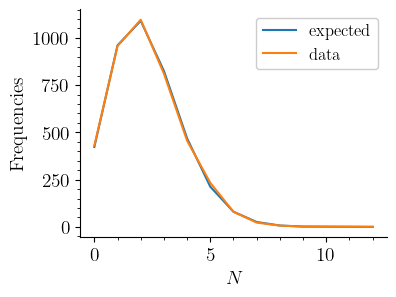

In [15]:
# ====== Pearson's chi-squared test, low mean distribution ======
# === Testing for Poisson ===
poisson = sc.stats.poisson(m)

total_observations = np.sum(lowmean) # total number of particles detected
sample_count = np.sum(frequencies)

poisson_probabilities = poisson.pmf(N) # the expected probability of detecting N particles (by null hypothesis)
expected_frequencies = sample_count * poisson_probabilities # the expected number of times N particles were detected (by null hypothesis)

plt.xlabel("$N$")
plt.ylabel("Frequencies")
plt.plot(N, expected_frequencies, label='expected')
plt.plot(N, frequencies, label='data')
plt.legend()

test_statistic = 0
for i in range(np.size(frequencies)):
    test_statistic += (frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i]

test_statistic = np.sum((frequencies - expected_frequencies)**2 / expected_frequencies)

print(test_statistic)

alpha = 0.05
dof = len(frequencies) - 1
chi2 = sc.stats.chi2(dof)
alpha_statistic = chi2.ppf(1 - alpha)
print(alpha_statistic)

In [16]:
highmean = np.loadtxt('../data/stat_highmean300ms.TKA')

In [17]:
np.mean(highmean)

np.float64(228.0966796875)

(100.0, 300.0)

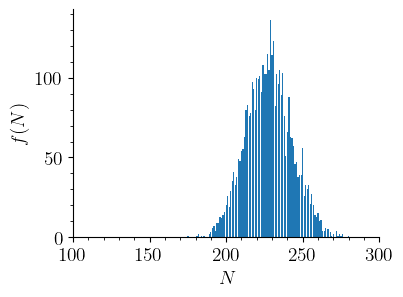

In [18]:
values, counts = np.unique_counts(highmean)
# plt.scatter(values, counts, s=4)
plt.xlabel("$N$")
plt.ylabel("$f(N)$")
plt.bar(values, counts)
plt.xlim(100, 300)

61.548964370730765
18.307038053275146


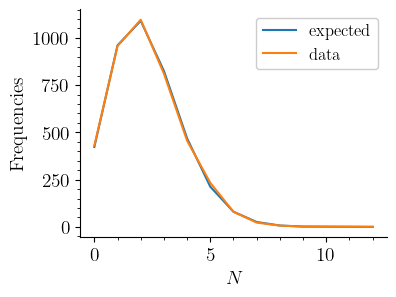

In [19]:
# ====== Pearson's chi-squared test, low mean distribution ======
# === Testing for Poisson ===
poisson = sc.stats.poisson(m)

total_observations = np.sum(highmean) # total number of particles detected
sample_count = np.sum(frequencies)

poisson_probabilities = poisson.pmf(N) # the expected probability of detecting N particles (by null hypothesis)
expected_frequencies = sample_count * poisson_probabilities # the expected number of times N particles were detected (by null hypothesis)

plt.xlabel("$N$")
plt.ylabel("Frequencies")
plt.plot(N, expected_frequencies, label='expected')
plt.plot(N, frequencies, label='data')
plt.legend()

test_statistic = 0
for i in range(np.size(frequencies)):
    test_statistic += (frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i]

test_statistic = np.sum((frequencies - expected_frequencies)**2 / expected_frequencies)

print(test_statistic)

alpha = 0.05
dof = len(frequencies) - 1
chi2 = sc.stats.chi2(dof)
alpha_statistic = chi2.ppf(1 - alpha)
print(alpha_statistic)